In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow 



In [3]:
!pip install tensorflow

# Data Preparation and Cleaning

In [119]:
# Loading the dataset into a DataFrame
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13299 entries, 0 to 13298
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APP_ID               13299 non-null  int64  
 1    CIBIL_SCORE_VALUE   13299 non-null  int64  
 2   NEW_CUST             13299 non-null  object 
 3   CUS_CATGCODE         13299 non-null  int64  
 4    EMPLOYMENT_TYPE     13299 non-null  int64  
 5   AGE                  13299 non-null  int64  
 6    SEX                 13299 non-null  object 
 7    NO_OF_DEPENDENTS    13299 non-null  int64  
 8    MARITAL             13299 non-null  int64  
 9    EDU_QUA             13299 non-null  int64  
 10    P_RESTYPE          13299 non-null  int64  
 11   P_CATEGORY          13299 non-null  int64  
 12   EMPLOYEE_TYPE       13299 non-null  int64  
 13    MON_IN_OCC         13299 non-null  int64  
 14   INCOM_EXP_GMI       13299 non-null  int64  
 15  LTV                  13299 non-null 

In [121]:
df.describe()

,APP_ID,CIBIL_SCORE_VALUE,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
count,13299.0000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000
mean,25643.0000,1.037898,0.908640,0.658922,32.473870,1.536281,0.590044,0.485149,0.427175,2.340778,0.833371,74.508760,0.751259,0.776054,24.792240,0.377171
std,7678.4699,0.865391,0.288132,0.474089,8.804317,0.971671,0.491844,0.499798,0.727715,1.341674,0.553415,72.971951,0.938441,0.126130,7.501085,0.484697
min,12345.0000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.007508,12.000000,0.000000
25%,18994.0000,0.000000,1.000000,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.719710,18.000000,0.000000
50%,25643.0000,1.000000,1.000000,1.000000,31.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,48.000000,0.000000,0.807537,24.000000,0.000000
75%,32292.0000,2.000000,1.000000,1.000000,38.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,100.000000,1.000000,0.849177,36.000000,1.000000
max,38941.0000,2.000000,1.000000,1.000000,55.000000,3.000000,1.000000,1.000000,2.000000,4.000000,2.000000,398.000000,3.000000,1.000000,36.000000,1.000000


In [122]:
# Removing the white spaces in the column names
df.columns = df.columns.str.replace(' ','')

In [123]:
# Data columns which doesn't affect the prediction are removed
df= df.drop(columns=['APP_ID'])
df.head()

,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


# Converting categorical values to numerical value

In [124]:
df['NEW_CUST'].replace(['NO','YES'],[0,1], inplace=True)
print(df['NEW_CUST'].value_counts(normalize = True))

df['SEX'].replace(['F','M'],[1,0], inplace=True)
print(df['SEX'].value_counts(normalize = True))

NEW_CUST
0    0.673885
1    0.326115
Name: proportion, dtype: float64
SEX
1    0.900444
0    0.099556
Name: proportion, dtype: float64


In [125]:
print(df.isna().sum())
df.head()

CIBIL_SCORE_VALUE    0
NEW_CUST             0
CUS_CATGCODE         0
EMPLOYMENT_TYPE      0
AGE                  0
SEX                  0
NO_OF_DEPENDENTS     0
MARITAL              0
EDU_QUA              0
P_RESTYPE            0
P_CATEGORY           0
EMPLOYEE_TYPE        0
MON_IN_OCC           0
INCOM_EXP_GMI        0
LTV                  0
TENURE               0
STATUS               0
dtype: int64


,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,0,1,1,0,31,1,3,0,0,1,4,2,36,0,0.767104,12,0
1,0,0,1,1,40,1,2,1,1,0,1,1,12,2,0.619077,24,0
2,0,1,1,0,27,1,3,0,0,1,2,2,72,0,0.848949,36,0
3,2,0,1,1,33,0,2,0,1,0,2,1,120,1,0.515646,12,0
4,2,0,1,1,29,1,1,0,1,1,2,1,24,2,0.614123,24,1


# Mapping the correlation between the data in the dataset

<Axes: >

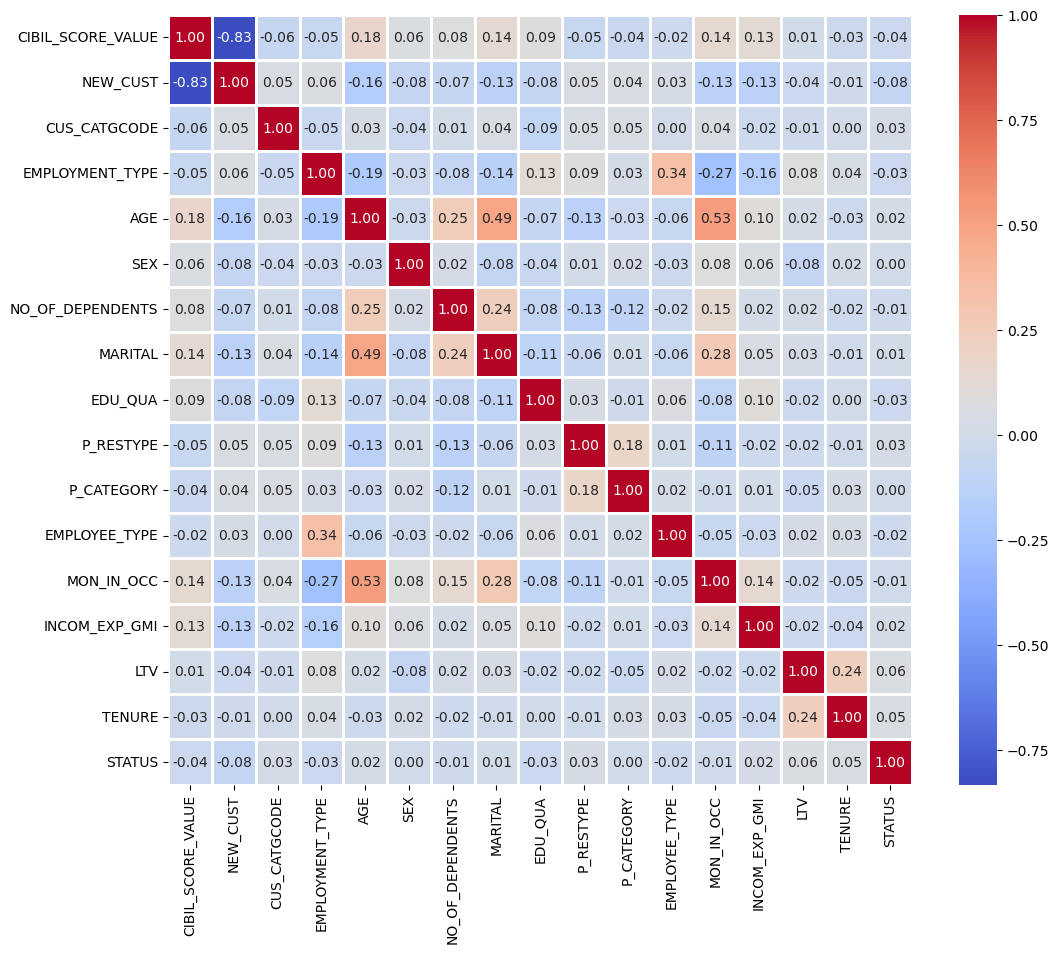

In [126]:
plt.figure(figsize=(12,10)) 
sns.heatmap(df.corr(),cmap='coolwarm',fmt='.2f', 
			linewidths=2,annot=True)


<Axes: xlabel='TENURE', ylabel='count'>

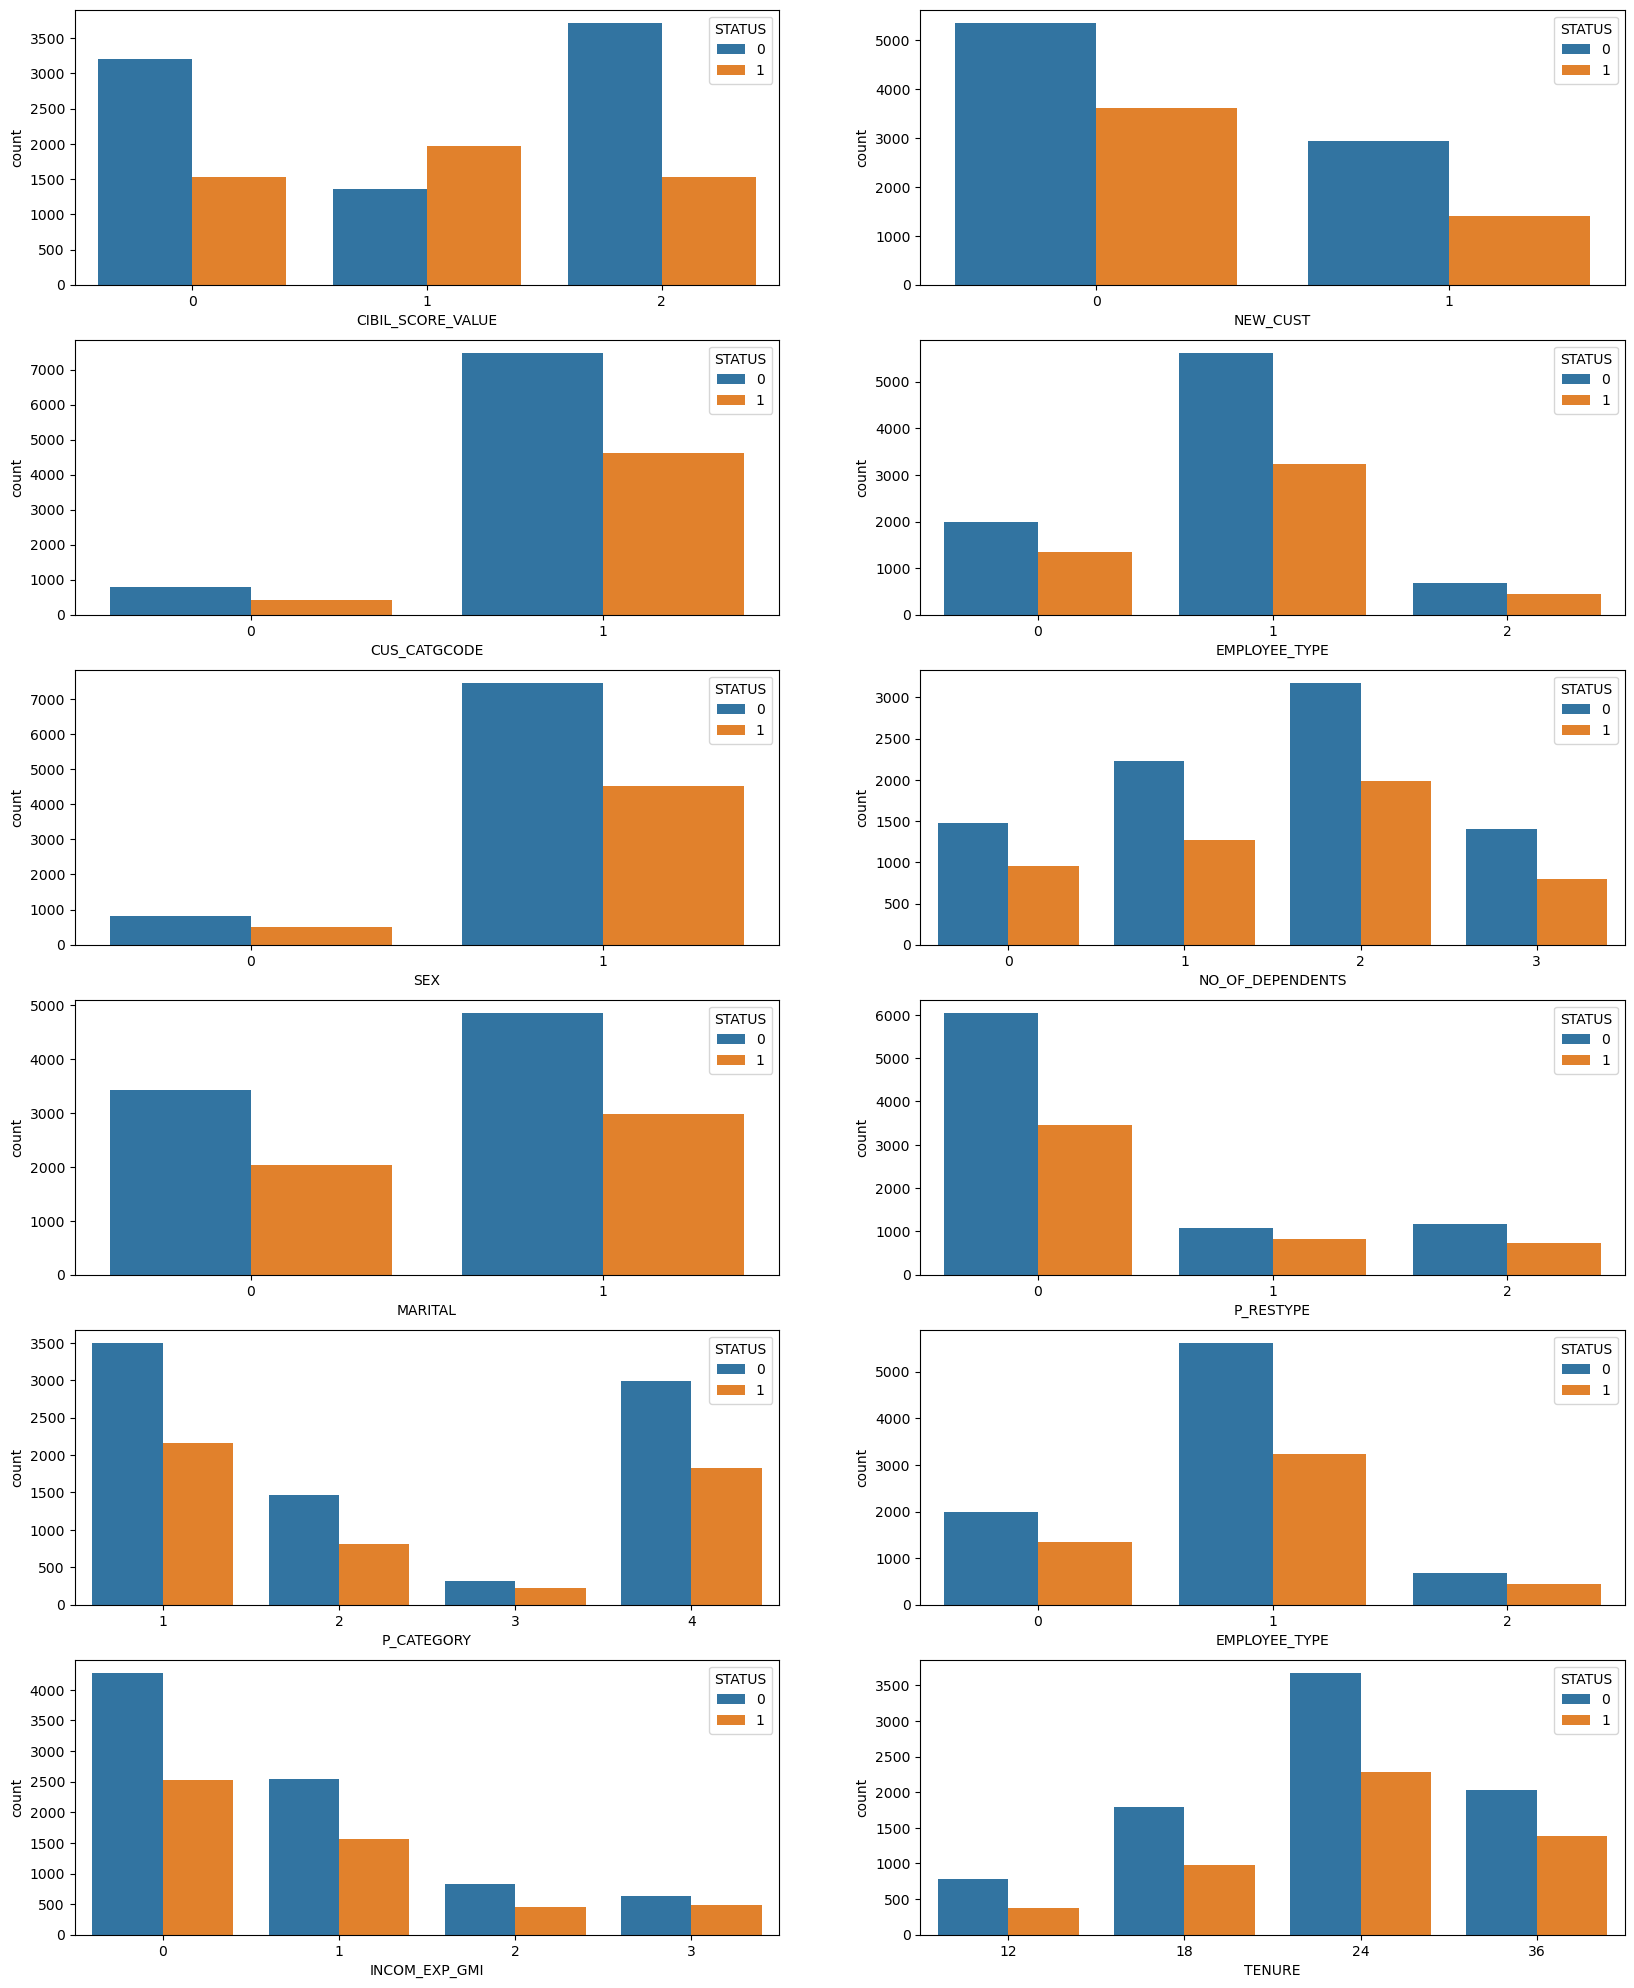

In [127]:
fig,axes = plt.subplots(6,2,figsize=(20,25))
sns.countplot(x='CIBIL_SCORE_VALUE',data=df,hue='STATUS',ax=axes[0,0])
sns.countplot(x='NEW_CUST',data=df,hue='STATUS',ax=axes[0,1])
sns.countplot(x='CUS_CATGCODE',data=df,hue='STATUS',ax=axes[1,0])
sns.countplot(x='EMPLOYEE_TYPE',data=df,hue='STATUS',ax=axes[1,1])

sns.countplot(x='SEX',data=df,hue='STATUS',ax=axes[2,0])
sns.countplot(x='NO_OF_DEPENDENTS',data=df,hue='STATUS',ax=axes[2,1])
sns.countplot(x='MARITAL',data=df,hue='STATUS',ax=axes[3,0])

sns.countplot(x='P_RESTYPE',data=df,hue='STATUS',ax=axes[3,1])
sns.countplot(x='P_CATEGORY',data=df,hue='STATUS',ax=axes[4,0])
sns.countplot(x='EMPLOYEE_TYPE',data=df,hue='STATUS',ax=axes[4,1])

sns.countplot(x='INCOM_EXP_GMI',data=df,hue='STATUS',ax=axes[5,0])
sns.countplot(x='TENURE',data=df,hue='STATUS',ax=axes[5,1])


In [128]:
#checking for unique entries in each columns
for col in df.columns:
        print('{} : {}'.format(col,df[col].unique()))

CIBIL_SCORE_VALUE : [0 2 1]
NEW_CUST : [1 0]
CUS_CATGCODE : [1 0]
EMPLOYMENT_TYPE : [0 1]
AGE : [31 40 27 33 29 26 38 25 21 42 34 28 24 53 30 35 50 32 44 36 20 54 22 55
 47 23 45 52 41 39 37 43 49 46 51 48 19 18]
SEX : [1 0]
NO_OF_DEPENDENTS : [3 2 1 0]
MARITAL : [0 1]
EDU_QUA : [0 1]
P_RESTYPE : [1 0 2]
P_CATEGORY : [4 1 2 3]
EMPLOYEE_TYPE : [2 1 0]
MON_IN_OCC : [ 36  12  72 120  24  48 110  26 216  84  96  17   2 180  60 300 108  14
   6   8  98  16  28 168 288   5   4  18  30 240   7   3 144  13 122  65
  25 336 132  87  39 137 150  29 276  49  85 360  15   1 245 305  27 252
 156 204  50 228  97  61  37 241 121  71  31 192  41 104 324 182 242  78
  38 312  53  40  19  52 130 264 154  63 218   9  62  73  42 183  66 126
 102  67 170 158 217  75  54 361 134 188 117  74 338 269 362 106 303 277
  86 100 266 302 185 112 341 138 123  11 148 330 368  44  77 125  10  91
  35 344 152 348  20 101  22 310  69 246  58  93 339 145 157  51 219 113
 194  89 290  68 146  32 384  92 181 265  70  33 1

In [129]:
df.shape

(13299, 17)

In [130]:
df['STATUS'].value_counts(normalize = True)

STATUS
0    0.622829
1    0.377171
Name: proportion, dtype: float64

In [131]:
# status column name is renamed to 'target'
df.rename(columns = {'STATUS':'TARGET'}, inplace = True)
df.head()

,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,TARGET
0,0,1,1,0,31,1,3,0,0,1,4,2,36,0,0.767104,12,0
1,0,0,1,1,40,1,2,1,1,0,1,1,12,2,0.619077,24,0
2,0,1,1,0,27,1,3,0,0,1,2,2,72,0,0.848949,36,0
3,2,0,1,1,33,0,2,0,1,0,2,1,120,1,0.515646,12,0
4,2,0,1,1,29,1,1,0,1,1,2,1,24,2,0.614123,24,1


# TRAINING & TESTING DATASET

In [132]:
#Splitting the dataset for training and testing
x = df.drop(['TARGET'], axis=1)
y = df["TARGET"]
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.15,shuffle = True,random_state=10, stratify = y)

In [133]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## RANDOMFOREST CLASSIFIER

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
model_rfc = RandomForestClassifier(n_estimators=50)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [136]:
y_pred = model_rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [137]:
print("Training set score: {:.3f}".format(model_rfc.score(X_train,y_train)))
print(f'Accuracy: {accuracy*100}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Training set score: 0.989
Accuracy: 64.66165413533834
Confusion Matrix:
[[1032  211]
 [ 494  258]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1243
           1       0.55      0.34      0.42       752

    accuracy                           0.65      1995
   macro avg       0.61      0.59      0.58      1995
weighted avg       0.63      0.65      0.62      1995



## LOGISTIC REGRESSION

In [138]:
from sklearn.linear_model import LogisticRegression

In [139]:
model_log = LogisticRegression(random_state=10)
model_log.fit(X_train, y_train)

LogisticRegression(random_state=10)

In [140]:
y_pred = model_log.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [141]:
print("Training set score: {:.3f}".format(model_log.score(X_train,y_train)))
print(f'Accuracy: {accuracy*100}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Training set score: 0.643
Accuracy: 64.81203007518796
Confusion Matrix:
[[1103  140]
 [ 562  190]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76      1243
           1       0.58      0.25      0.35       752

    accuracy                           0.65      1995
   macro avg       0.62      0.57      0.55      1995
weighted avg       0.63      0.65      0.61      1995



## KN NEIGHBOR CLASSIFIER

In [142]:
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn_classifier = KNeighborsClassifier(n_neighbors = 100)
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=100)

In [144]:
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [145]:
print("Training set score: {:.3f}".format(knn_classifier.score(X_train,y_train)))
print(f'Accuracy: {accuracy*100}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Training set score: 0.637
Accuracy: 62.70676691729323
Confusion Matrix:
[[1185   58]
 [ 686   66]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.95      0.76      1243
           1       0.53      0.09      0.15       752

    accuracy                           0.63      1995
   macro avg       0.58      0.52      0.46      1995
weighted avg       0.60      0.63      0.53      1995



## GRADIENTBOOST CLASSIFIER

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
gb_classifier = GradientBoostingClassifier(n_estimators=100)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier()

In [148]:
y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [149]:
print("Training set score: {:.3f}".format(gb_classifier.score(X_train,y_train)))
print(f'Accuracy: {accuracy*100}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Training set score: 0.684
Accuracy: 67.468671679198
Confusion Matrix:
[[1060  183]
 [ 466  286]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.77      1243
           1       0.61      0.38      0.47       752

    accuracy                           0.67      1995
   macro avg       0.65      0.62      0.62      1995
weighted avg       0.66      0.67      0.65      1995



## NAIVE BAYES CLASSIFIER

In [150]:
from sklearn.naive_bayes import GaussianNB

In [151]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [152]:
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [153]:
print("Training set score: {:.3f}".format(gnb.score(X_train,y_train)))
print(f'Accuracy: {accuracy*100}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Training set score: 0.637
Accuracy: 63.90977443609023
Confusion Matrix:
[[1130  113]
 [ 607  145]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76      1243
           1       0.56      0.19      0.29       752

    accuracy                           0.64      1995
   macro avg       0.61      0.55      0.52      1995
weighted avg       0.62      0.64      0.58      1995



# SVM

In [154]:
from sklearn import svm
from sklearn.svm import SVC

In [155]:
svm = SVC(kernel= 'linear', random_state=1, C=0.1)
svm.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=1)

In [156]:
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [157]:
print("Training set score: {:.3f}".format(svm.score(X_train,y_train)))
print(f'Accuracy: {accuracy*100}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Training set score: 0.657
Accuracy: 65.96491228070175
Confusion Matrix:
[[1003  240]
 [ 439  313]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1243
           1       0.57      0.42      0.48       752

    accuracy                           0.66      1995
   macro avg       0.63      0.61      0.61      1995
weighted avg       0.65      0.66      0.65      1995



# Accuracy

For building a prediction model for 'Bank Loan Approval' multiple algorithms have been used for training purposes like RandomForest Classifier, Logistic Regression, KN Neighbor Classifier, GradientBoosting Classifer, Gaussian Naive-Bayes Classifier and SVM

Accuracy of all 6 models are

    1. RandomForest Classifier :          Accuracy = 64.66165413533834 %
    2. Logistic Regression :              Accuracy = 64.81203007518796 %
    3. KN Neighbor Classifier :           Accuracy = 62.70676691729323 %
    4. GradientBoosting Classifer :       Accuracy = 67.468671679198 %
    5. Gaussian Naive-Bayes Classifier :  Accuracy = 63.90977443609023 %
    6. SVM :                              Accuracy = 65.96491228070175 %

    As we can see GradientBoosting Classifier model has the highest accuracy for this prediction model.
    
    Now we will classify whether our loan will be approved or not so we have to select the model with "High Precision" (i.e.Low False Positive).
    
The top 3 models with high accuracy are
    
    1. GradientBoosting Classifer = 183
    2. SVM = 240
    3. RandomForest Classifier = 211
    
    Here we can observe that the "GradientBoosting Classifer" has both high precision and low false positive comparing the other two models
    
Now we are creating an prediction model for bank loan approval/rejection using Gradient boosting Classifier

# Hyperparameter tuning of Gradient boosting algorithm
Hyperparameter tuning for Gradient Boosting involves systematically searching for the best combination of hyperparameter values that optimize the performance of the model. Gradient Boosting models have various hyperparameters that can be adjusted to achieve better results. Common hyperparameters include 

    • n_estimators 
    • learning_rate 
    • max_depth
    • subsample
    • max_features


In [158]:
from sklearn.model_selection import GridSearchCV

In [170]:
# Define the hyperparameter grid for tuning each parameter separately
param_grids = {
    'n_estimators': [10, 50, 100, 200, 500, 1000],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_features':[1, 2, 3, 4, 5, 6, 7],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Initialize an empty dictionary to store the best models for each hyperparameter
best_models = {}

# Perform Grid Search for each hyperparameter
for param_name, param_values in param_grids.items():
    grid_search = GridSearchCV(
        estimator=GradientBoostingClassifier(),
        param_grid={param_name: param_values},
        cv=5,
        scoring='accuracy'
    )
    grid_search.fit(X_train, y_train)

    # Get the best model
    best_models[param_name] = {
        'best_value': grid_search.best_params_[param_name],
        'best_model': grid_search.best_estimator_
    }

# Print the results
for param_name, results in best_models.items():
    print(f"Best value for {param_name}: {results['best_value']}")
    best_model = results['best_model']
    predictions = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy for {param_name}: {accuracy}\n")


Best value for n_estimators: 50
Accuracy for n_estimators: 0.6761904761904762

Best value for learning_rate: 0.1
Accuracy for learning_rate: 0.67468671679198

Best value for max_depth: 3
Accuracy for max_depth: 0.67468671679198

Best value for max_features: 7
Accuracy for max_features: 0.6736842105263158

Best value for subsample: 0.7
Accuracy for subsample: 0.675187969924812



# Improvised Gradient boosting classifier prediction model for aprroval/rejection of loan

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [171]:
gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,
                                           max_features=7, subsample=0.7)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(max_features=7, n_estimators=50, subsample=0.7)

In [172]:
y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [173]:
print("Training set score: {:.3f}".format(gb_classifier.score(X_train,y_train)))
print(f'Accuracy: {accuracy*100}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Training set score: 0.676
Accuracy: 67.66917293233082
Confusion Matrix:
[[1065  178]
 [ 467  285]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77      1243
           1       0.62      0.38      0.47       752

    accuracy                           0.68      1995
   macro avg       0.66      0.62      0.62      1995
weighted avg       0.67      0.68      0.66      1995



## The Gradient Boosting Classifier model achieved a training set score of 0.676, indicating a moderately effective fit to the training data. The accuracy of 67.67% suggests that the model correctly classified instances nearly 68% of the time.